In [3]:
#Set current directory
import os
import sys

import numpy as np
import matplotlib.pyplot as plt

import pickle as pkl

PACKAGE_PARENT = '..'
SCRIPT_DIR = os.path.dirname(os.path.realpath(os.path.join(os.getcwd())))
sys.path.append(SCRIPT_DIR)
print(SCRIPT_DIR)

#Configuration
large = 20; med = 12; small = 10
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large,
          'xtick.direction': 'out',  
          'ytick.direction': 'out',  
          'xtick.minor.visible': True,  
          'ytick.minor.visible': True,
          'xtick.major.size': 8,
          'xtick.minor.size': 4,
          'ytick.major.size': 8,
          'ytick.minor.size': 4,
          'lines.linewidth': 1.75}
plt.rcParams.update(params)

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

C:\Users\Daniel SB\Documents\GitHub


Using CAMB 1.3.6 installed at c:\Users\Daniel SB\anaconda3\envs\envcamb\lib\site-packages\camb
Note: redshifts have been re-sorted (earliest first)


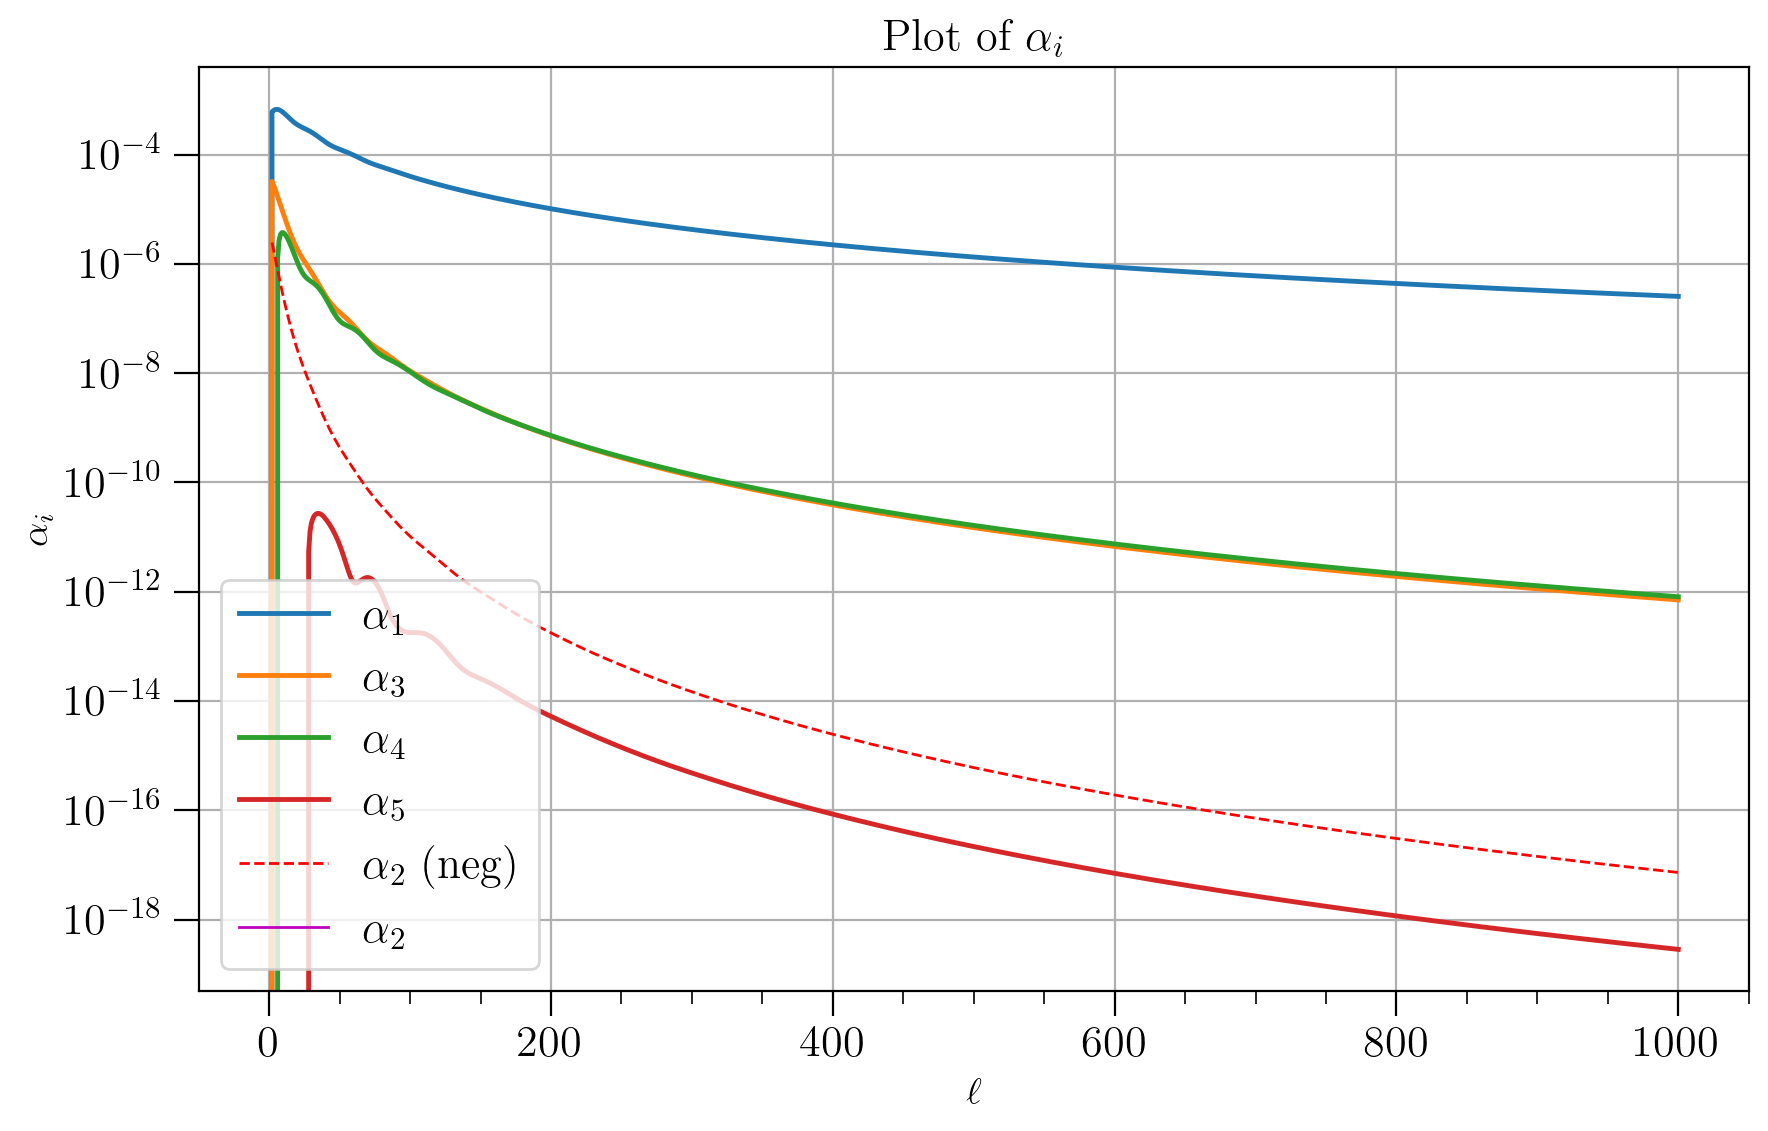

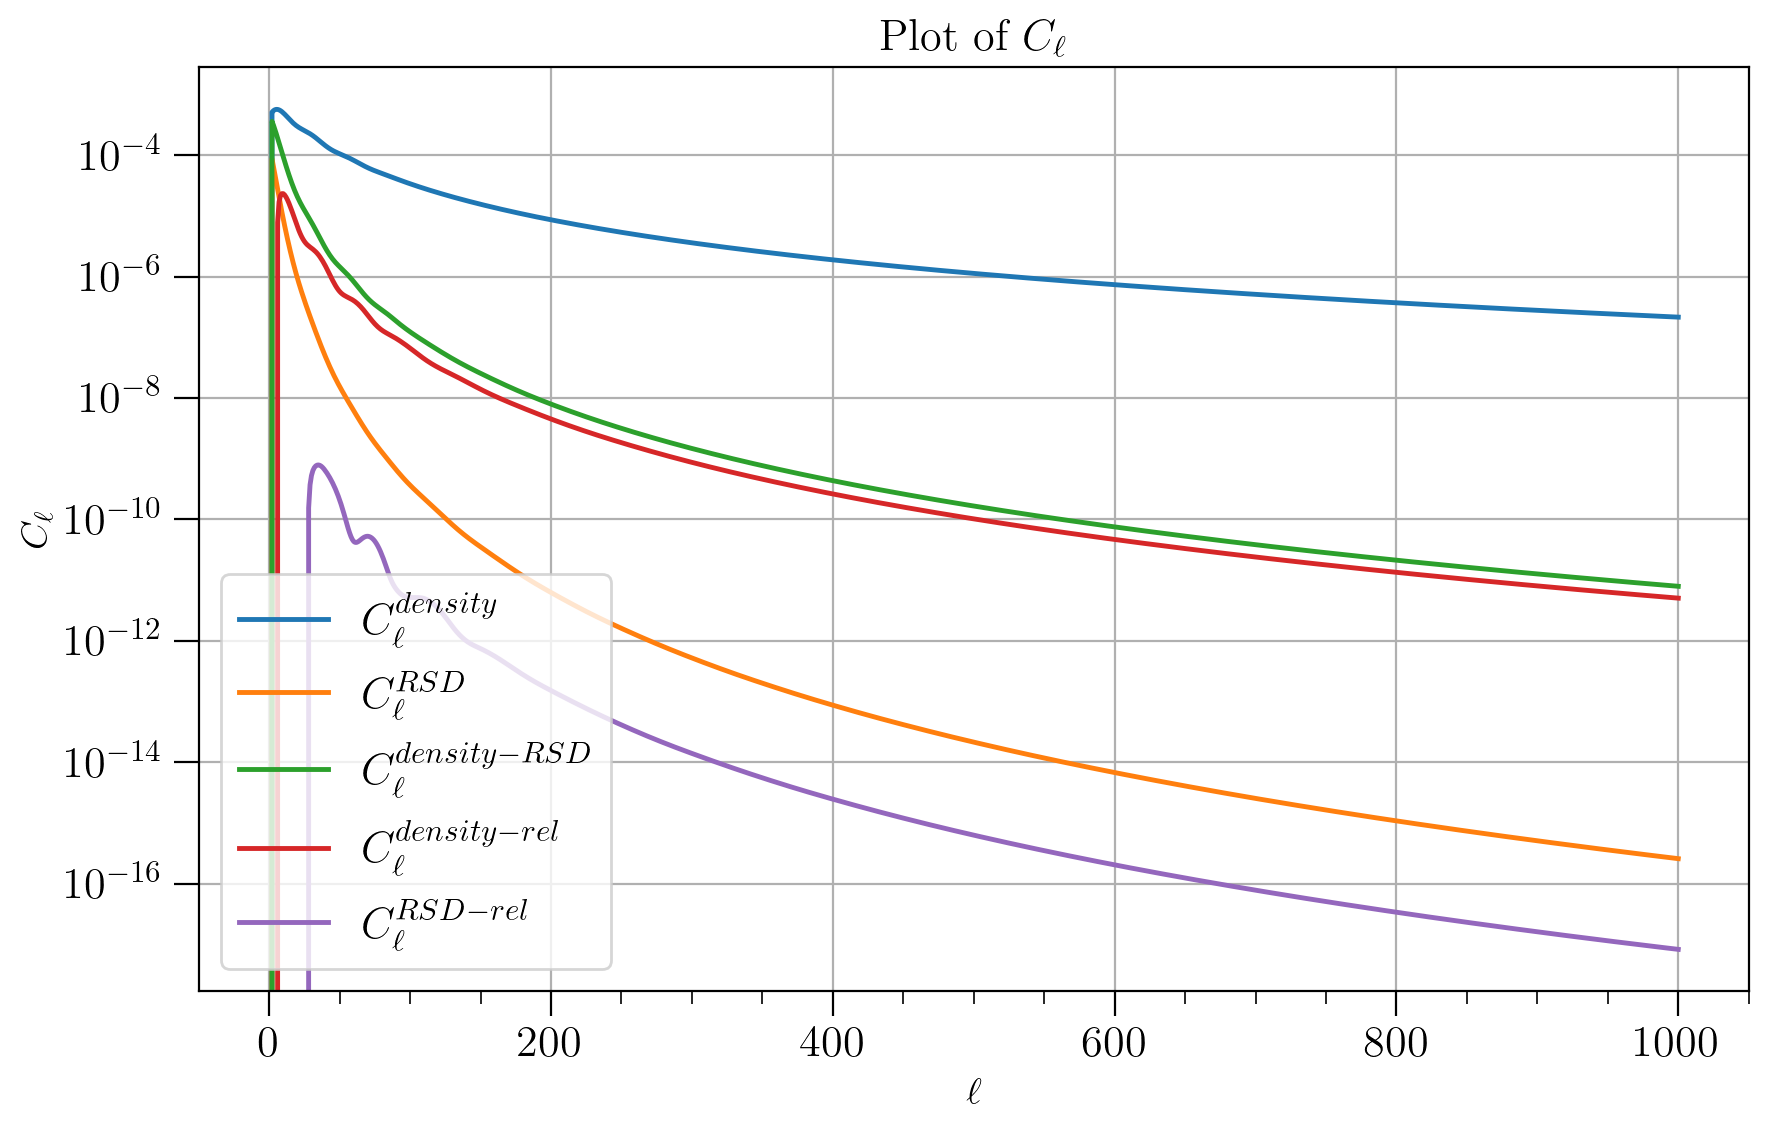

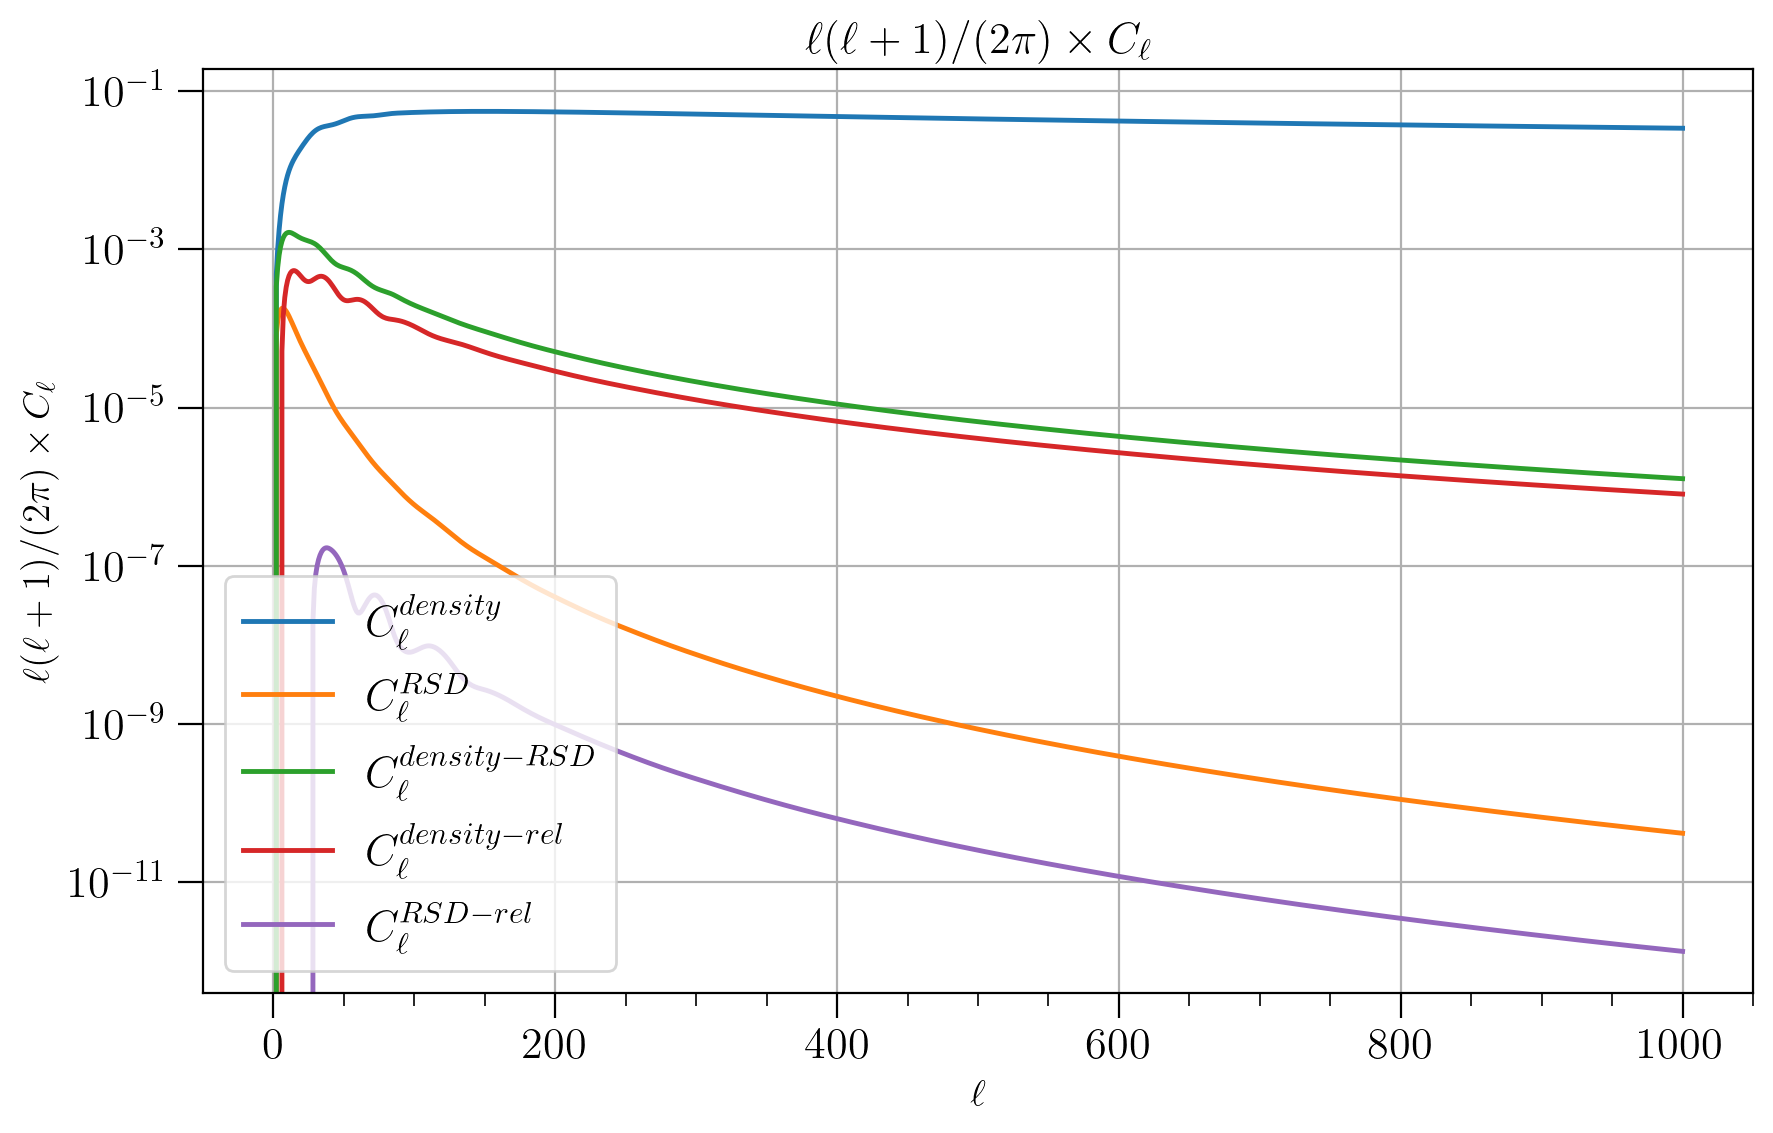

<Figure size 640x480 with 0 Axes>

In [2]:
%run alphas_calculation.py

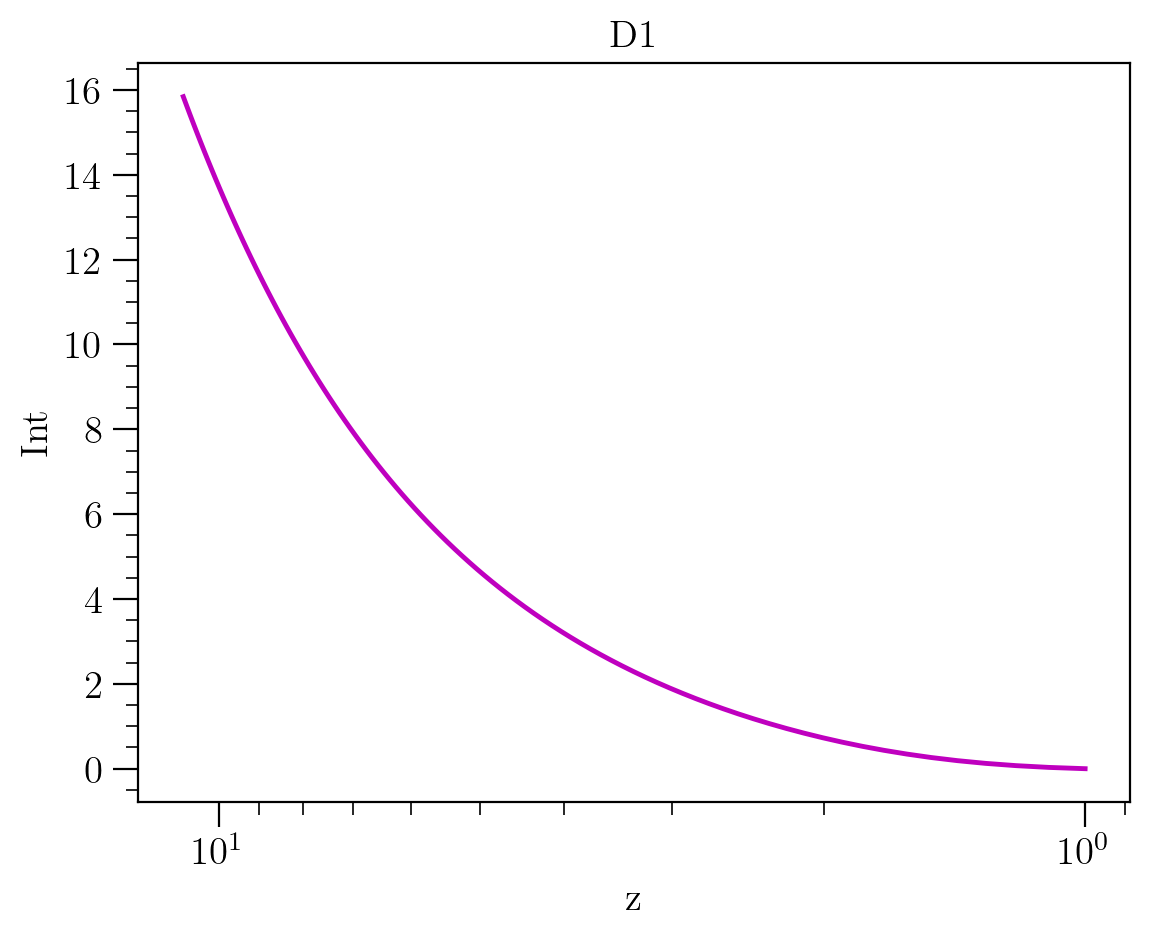

<Figure size 640x480 with 0 Axes>

In [4]:
%run class_cosmo_quantities_old.py

In [1]:
# Define a parameter file out of the parameters used in alphas_calculation.py

params = {
    'Omega_m' : 0.31,
    'Omega_Lambda' : 0.69,
    'H_0' : 67.66,
    'ombh2' : 0.02236,
    'omch2' : 0.1200,
    'mnu' : 0.06,
    'omk' : 0,
    'tau' : 0.0544,
    'As' : 2.100549e-9,    
    'ns' : 0.9652,
    'r' : 0,
    'z' : 0.15,
    'sigma' : 0.02,
    'bias_F' : 1.,
    'bias_B' : 1.5,
    'lmax' : 1000
}

In [2]:
params

{'Omega_m': 0.31,
 'Omega_Lambda': 0.69,
 'H_0': 67.66,
 'ombh2': 0.02236,
 'omch2': 0.12,
 'mnu': 0.06,
 'omk': 0,
 'tau': 0.0544,
 'As': 2.100549e-09,
 'ns': 0.9652,
 'r': 0,
 'z': 0.15,
 'sigma': 0.02,
 'bias_F': 1.0,
 'bias_B': 1.5,
 'lmax': 1000}